In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_8_16 = './10-22-2024_combined_distances_subsampling_8_16.csv'
df_8_16 = pd.read_csv(csv_file_8_16)

csv_file_32_64 = './10-17-2024_combined_distances_subsampling_32_64.csv'
df_32_64 = pd.read_csv(csv_file_32_64)

csv_file_256_512 = './10-21-2024_combined_distances_subsampling_256_512.csv'
df_256_512 = pd.read_csv(csv_file_256_512)

# Show the first few rows to confirm the data is loaded correctly
#print(df.head())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
df_8_16


,pdb_file,shortest_ARG126-GLU52,shortest_ARG126-PHE59,shortest_ARG126-GLU62,shortest_ARG129-GLU52,shortest_ARG129-PHE59,shortest_ARG129-GLU62,shortest_ARG132-GLU52,shortest_ARG132-PHE59,shortest_ARG132-GLU62,...,CA_GLU252_CA-GLU1353_CA,CA_GLU595_CA-GLU1024_CA,CA_GLU595_CA-GLU1353_CA,CA_GLU1024_CA-GLU1353_CA,CA_LEU290_CA-LEU638_CA,CA_LEU290_CA-VAL1071_CA,CA_LEU290_CA-ILE1402_CA,CA_LEU638_CA-VAL1071_CA,CA_LEU638_CA-ILE1402_CA,CA_ILE1402_CA-VAL1071_CA
0,model_2_ptm_r3_seed1.pdb,3.1,14.1,19.2,4.9,6.3,10.9,13.3,2.9,3.7,...,40.31,44.31,43.03,30.51,21.00,12.74,17.78,32.69,29.24,15.09
1,model_3_ptm_r4_seed7.pdb,3.1,14.1,19.2,4.6,6.5,10.6,11.1,2.3,4.5,...,13.07,12.44,12.08,7.19,9.77,9.58,14.02,13.67,10.11,10.41
2,model_4_ptm_r1_seed6.pdb,2.6,14.9,18.7,5.6,8.0,11.4,14.8,4.1,4.6,...,45.06,41.42,47.54,18.16,14.06,15.75,38.13,26.10,50.29,26.13
3,model_5_ptm_r6_seed0.pdb,2.4,13.4,18.5,5.6,6.7,10.9,12.7,2.8,4.2,...,45.56,52.01,54.45,19.77,10.97,18.61,35.48,28.73,45.65,25.22
4,model_5_ptm_r11_seed2.pdb,4.2,14.9,19.4,5.3,8.8,12.7,10.9,2.9,5.8,...,6.73,6.45,9.46,6.89,8.47,11.73,11.65,8.49,13.38,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,model_4_ptm_r2_seed3.pdb,4.5,14.7,19.7,4.8,8.1,12.7,12.1,3.1,4.5,...,51.48,55.20,50.92,25.30,13.23,23.31,37.26,32.75,38.85,23.79
646,model_5_ptm_r5_seed5.pdb,3.9,15.0,19.6,4.8,8.8,12.8,10.5,3.1,6.2,...,47.55,58.05,53.93,6.26,9.36,39.54,34.06,46.70,41.21,12.33
647,model_3_ptm_r9_seed9.pdb,3.9,14.2,19.4,5.0,7.6,12.0,12.2,2.7,4.4,...,10.44,10.78,7.99,6.63,8.47,10.20,13.87,13.09,9.64,12.53
648,model_1_ptm_r12_seed2.pdb,4.3,14.7,19.6,2.8,8.7,12.9,10.1,2.5,2.4,...,7.16,6.45,10.15,7.29,7.69,10.86,10.33,7.99,11.63,7.33


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distance_pairs_violin_csv(df, pair_columns, recycle_number=None, title_custom_add='', colors=None, fig_width=10, fig_height=6):
    """
    Plots the distribution of paired distances from a DataFrame as divided violin plots.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    pair_columns (dict): A dictionary where keys are labels for distance pairs, and values are tuples of column names for the distances.
    recycle_number (int): The recycle number to filter distances by, extracted from 'pdb_file' column.
    title_custom_add (str): A custom addition to the plot title.
    colors (list): Optional list of colors to use for the violin plots.
    fig_width (int/float): The width of the figure.
    fig_height (int/float): The height of the figure.

    Returns:
    None: Displays the violin plot.
    """
    # Filter the DataFrame based on the specified recycle number if provided
    if recycle_number is not None:
        recycle_str = f'r{recycle_number}'
        df = df[df['pdb_file'].str.contains(recycle_str, regex=False)]
        if df.empty:
            print(f"No entries found for recycle number {recycle_number} in the DataFrame.")
            return

    # Prepare the data for plotting
    plot_data = []
    for pair_label, (col1, col2) in pair_columns.items():
        if col1 not in df.columns or col2 not in df.columns:
            print(f"Error: Columns '{col1}' or '{col2}' not found in the DataFrame.")
            continue
        
        # Extract distances, dropping NaN values
        distances_1 = df[col1].dropna()
        distances_2 = df[col2].dropna()

        # Append the data with labels for the pair
        plot_data.append(pd.DataFrame({
            'Pair': [pair_label] * (len(distances_1) + len(distances_2)),
            'Distance': list(distances_1) + list(distances_2),
            'Category': ['Distance_1'] * len(distances_1) + ['Distance_2'] * len(distances_2)
        }))

    # Concatenate all data into a single DataFrame for plotting
    if not plot_data:
        print("No valid data to plot.")
        return
    plot_df = pd.concat(plot_data, ignore_index=True)

    # Set a soft, elegant style for the plot
    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    # Plot divided violin plots
    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(
        x='Pair', y='Distance', hue='Category', data=plot_df, split=True,
        palette=colors if colors and len(colors) >= 2 else sns.color_palette("Set2", 2),
        inner='quartile', cut=0, linewidth=0.8
    )

    # Customize the plot appearance
    plt.title(f'Distribution of Distance Pairs {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Distance Pair', fontsize=32)
    plt.ylabel('Distance (Å)', fontsize=32)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    sns.despine()

    plt.tight_layout()
    plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


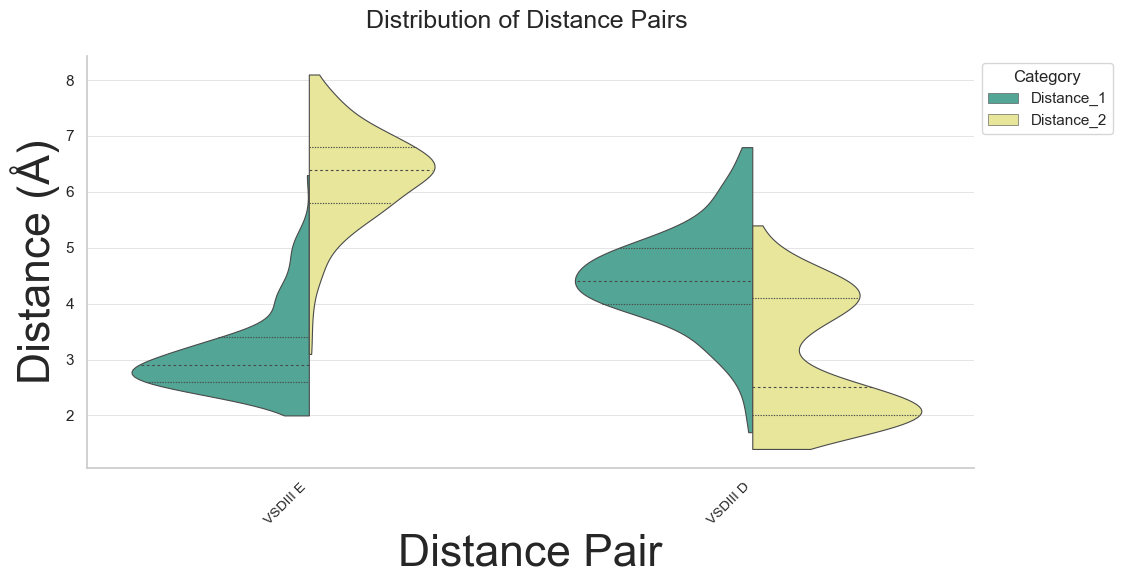

In [52]:
# Example DataFrame


#shortest_ARG509-GLU443,shortest_ARG509-PHE456,shortest_ARG509-GLU459,shortest_ARG512-GLU443,shortest_ARG512-PHE456,shortest_ARG512-GLU459,shortest_ARG515-GLU443,shortest_ARG515-PHE456,shortest_ARG515-GLU459,shortest_LYS518-GLU443,shortest_LYS518-PHE456,shortest_LYS518-GLU459,shortest_ARG521-GLU443,shortest_ARG521-PHE456,shortest_ARG521-GLU459
#VSDIII: shortest_LYS904-ASP826,shortest_LYS904-PHE829,shortest_LYS904-PHE833,shortest_LYS904-GLU836,shortest_ARG907-ASP826,shortest_ARG907-PHE829,shortest_ARG907-PHE833,shortest_ARG907-GLU836,shortest_ARG910-ASP826,shortest_ARG910-PHE829,shortest_ARG910-PHE833,shortest_ARG910-GLU836,shortest_ARG913-ASP826,shortest_ARG913-PHE829,shortest_ARG913-PHE833,shortest_ARG913-GLU836,shortest_ARG916-ASP826,shortest_ARG916-PHE829,shortest_ARG916-PHE833,shortest_ARG916-GLU836,shortest_ARG920-ASP826,shortest_ARG920-PHE833,shortest_ARG920-GLU836
# Pair dictionary (column pairs for plotting)
pair_dict = {
    # 'Pair 1': ('shortest_ARG126-GLU52', 'shortest_ARG129-GLU52'),
    # 'Pair 2': ('shortest_ARG509-GLU443', 'shortest_ARG512-GLU443'),
    'VSDIII E': ('shortest_ARG916-GLU836', 'shortest_ARG913-GLU836'),
    'VSDIII D': ('shortest_ARG907-ASP826', 'shortest_ARG910-ASP826')
}

# Plot the distance pairs as divided violins
plot_distance_pairs_violin_csv(
    df_32_64, 
    pair_dict, 
    recycle_number=1, 
    title_custom_add='', 
    colors=['#45b39d', '#f4f38d', '#52b345', '#f4f38d']
)


In [42]:
# Pair dictionary (column pairs for plotting)
pair_dict = {
    'VSDIII E': ('shortest_ARG916-GLU836', 'shortest_ARG913-GLU836'),
    'VSDIII D': ('shortest_ARG907-ASP826', 'shortest_ARG910-ASP826')
}

# Updated function call to handle multiple recycles
def plot_distance_pairs_violin_csv(df, pair_dict, recycle_numbers, title_custom_add='', colors=None):
    """
    Plots the distance pairs as divided violins for multiple recycles.
    
    Args:
        df (DataFrame): Input data frame containing distance measurements.
        pair_dict (dict): Dictionary of column pairs for plotting.
        recycle_numbers (list): List of recycle numbers to include in the plot.
        title_custom_add (str): Custom string to append to the plot title.
        colors (list): List of colors for the violin plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure colors are defined
    if colors is None:
        colors = ['#45b39d', '#ecde2a', '#52b345', '#f4f38d']
    
    # Filter the DataFrame for the given recycle numbers
    df_filtered = df[df['recycle'].isin(recycle_numbers)]
    
    # Loop over the pairs in the dictionary to plot each pair
    for pair_name, (col1, col2) in pair_dict.items():
        # Ensure both columns exist in the DataFrame
        if col1 in df_filtered.columns and col2 in df_filtered.columns:
            data = pd.melt(
                df_filtered,
                id_vars=['recycle'],
                value_vars=[col1, col2],
                var_name='Distance Pair',
                value_name='Distance'
            )

            plt.figure(figsize=(10, 6))
            sns.violinplot(
                data=data,
                x='recycle',
                y='Distance',
                hue='Distance Pair',
                split=True,
                palette=colors[:2]  # Limit colors to the first two
            )
            plt.title(f'{pair_name} - Recycles: {recycle_numbers} {title_custom_add}')
            plt.xlabel('Recycle Number')
            plt.ylabel('Distance')
            plt.legend(title='Distance Pair')
            plt.show()
        else:
            print(f"Columns {col1} and/or {col2} not found in the DataFrame.")

# Example usage
recycle_numbers = [1, 2, 3]  # Specify the list of recycle numbers you want to include
plot_distance_pairs_violin_csv(df_32_64, pair_dict, recycle_numbers, title_custom_add='Example Plot')


KeyError: 'recycle'

In [43]:
print(df_32_64.columns)



Index(['pdb_file', 'shortest_ARG126-GLU52', 'shortest_ARG126-PHE59',
       'shortest_ARG126-GLU62', 'shortest_ARG129-GLU52',
       'shortest_ARG129-PHE59', 'shortest_ARG129-GLU62',
       'shortest_ARG132-GLU52', 'shortest_ARG132-PHE59',
       'shortest_ARG132-GLU62',
       ...
       'CA_GLU252_CA-GLU1353_CA', 'CA_GLU595_CA-GLU1024_CA',
       'CA_GLU595_CA-GLU1353_CA', 'CA_GLU1024_CA-GLU1353_CA',
       'CA_LEU290_CA-LEU638_CA', 'CA_LEU290_CA-VAL1071_CA',
       'CA_LEU290_CA-ILE1402_CA', 'CA_LEU638_CA-VAL1071_CA',
       'CA_LEU638_CA-ILE1402_CA', 'CA_ILE1402_CA-VAL1071_CA'],
      dtype='object', length=183)
